In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key

In [2]:
#create set random lat and long combinations
lats = np.random.uniform(low=-90, high=90, size=2000)
lngs = np.random.uniform(low=-180, high=180, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#create list for holding cities
cities = []

#Identify the nearest city each lat and long
for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city unique then add city to list
    if city not in cities:
        cities.append(city)
#print city count
len(cities)

773

In [5]:
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | ligayan
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | nikel
Processing Record 7 of Set 1 | cidreira
Processing Record 8 of Set 1 | iquique
Processing Record 9 of Set 1 | kapaa
Processing Record 10 of Set 1 | dhangadhi
Processing Record 11 of Set 1 | talaya
Processing Record 12 of Set 1 | chokurdakh
Processing Record 13 of Set 1 | aasiaat
Processing Record 14 of Set 1 | touros
Processing Record 15 of Set 1 | mogadishu
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | edd
Processing Record 18 of Set 1 | pangkalanbuun
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | havoysund
Processing Record 21 of Set 1 | ocos
Processing Record 22 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 23 of Set 1 | troitsko-pechorsk
Processin

Processing Record 40 of Set 4 | taltal
Processing Record 41 of Set 4 | dingle
Processing Record 42 of Set 4 | bethel
Processing Record 43 of Set 4 | severo-kurilsk
Processing Record 44 of Set 4 | cabo san lucas
Processing Record 45 of Set 4 | sangin
Processing Record 46 of Set 4 | amahai
Processing Record 47 of Set 4 | taoudenni
Processing Record 48 of Set 4 | steamboat springs
Processing Record 49 of Set 4 | bluff
Processing Record 50 of Set 4 | torbay
Processing Record 1 of Set 5 | senno
Processing Record 2 of Set 5 | trinidad
Processing Record 3 of Set 5 | viligili
City not found. Skipping...
Processing Record 4 of Set 5 | portland
Processing Record 5 of Set 5 | fort-shevchenko
Processing Record 6 of Set 5 | pisco
Processing Record 7 of Set 5 | butaritari
Processing Record 8 of Set 5 | thompson
Processing Record 9 of Set 5 | port macquarie
Processing Record 10 of Set 5 | chauk
Processing Record 11 of Set 5 | yerbogachen
Processing Record 12 of Set 5 | nikolskoye
Processing Record 13

Processing Record 30 of Set 8 | lolua
City not found. Skipping...
Processing Record 31 of Set 8 | kavieng
Processing Record 32 of Set 8 | oyem
Processing Record 33 of Set 8 | champasak
Processing Record 34 of Set 8 | padang
Processing Record 35 of Set 8 | menongue
Processing Record 36 of Set 8 | zhigansk
Processing Record 37 of Set 8 | verkhnyaya inta
Processing Record 38 of Set 8 | presidente olegario
Processing Record 39 of Set 8 | shelburne
Processing Record 40 of Set 8 | nieuwpoort
Processing Record 41 of Set 8 | pointe michel
Processing Record 42 of Set 8 | bambui
Processing Record 43 of Set 8 | bubaque
Processing Record 44 of Set 8 | walvis bay
Processing Record 45 of Set 8 | sambava
Processing Record 46 of Set 8 | kamaishi
Processing Record 47 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 8 | pucallpa
Processing Record 49 of Set 8 | sousa
Processing Record 50 of Set 8 | la asuncion
Processing Record 1 of Set 9 | novomikhaylovskiy
Processing Rec

Processing Record 18 of Set 12 | warri
Processing Record 19 of Set 12 | valentin gomez farias
Processing Record 20 of Set 12 | verkhnevilyuysk
Processing Record 21 of Set 12 | komsomolskiy
Processing Record 22 of Set 12 | nandigama
Processing Record 23 of Set 12 | penzance
Processing Record 24 of Set 12 | kharp
Processing Record 25 of Set 12 | listvyanskiy
Processing Record 26 of Set 12 | alice springs
Processing Record 27 of Set 12 | meyungs
City not found. Skipping...
Processing Record 28 of Set 12 | katangli
Processing Record 29 of Set 12 | san lorenzo
Processing Record 30 of Set 12 | kysyl-syr
Processing Record 31 of Set 12 | khasan
Processing Record 32 of Set 12 | raasiku
Processing Record 33 of Set 12 | zyryanka
Processing Record 34 of Set 12 | susanville
Processing Record 35 of Set 12 | cervo
Processing Record 36 of Set 12 | mareeba
Processing Record 37 of Set 12 | hirado
Processing Record 38 of Set 12 | great bend
Processing Record 39 of Set 12 | atar
Processing Record 40 of Se

Processing Record 5 of Set 16 | carauari
Processing Record 6 of Set 16 | pimentel
Processing Record 7 of Set 16 | bud
Processing Record 8 of Set 16 | de-kastri
Processing Record 9 of Set 16 | redlands
Processing Record 10 of Set 16 | yarmolyntsi
Processing Record 11 of Set 16 | coihaique
Processing Record 12 of Set 16 | voh
Processing Record 13 of Set 16 | ilam
Processing Record 14 of Set 16 | knurow
Processing Record 15 of Set 16 | bure
Processing Record 16 of Set 16 | cockburn town
Processing Record 17 of Set 16 | buckeye
Processing Record 18 of Set 16 | sangueya
Processing Record 19 of Set 16 | kyren
Processing Record 20 of Set 16 | balapulang
Processing Record 21 of Set 16 | ngunguru
Processing Record 22 of Set 16 | salinopolis
Processing Record 23 of Set 16 | kuytun
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
#convert array of dict to Pandas
city_data_df = pd.DataFrame(city_data)
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-02-13 17:36:02,-33.6500,115.3333,65.05,70,4,12.48
1,Ligayan,PH,2022-02-13 17:36:03,4.6533,119.4706,81.28,76,100,9.55
2,Ushuaia,AR,2022-02-13 17:36:03,-54.8000,-68.3000,46.06,76,100,48.34
3,Avarua,CK,2022-02-13 17:36:04,-21.2078,-159.7750,75.25,94,40,3.44
4,Nikel,RU,2022-02-13 17:36:04,69.4128,30.2220,10.58,91,100,7.16
5,Cidreira,BR,2022-02-13 17:35:25,-30.1811,-50.2056,72.21,89,90,10.51
6,Iquique,CL,2022-02-13 17:32:03,-20.2208,-70.1431,73.44,65,91,9.13
7,Kapaa,US,2022-02-13 17:36:05,22.0752,-159.3190,70.12,85,100,12.66
8,Dhangadhi,NP,2022-02-13 17:36:05,28.7079,80.5961,56.17,75,0,4.16
9,Talaya,RU,2022-02-13 17:36:06,61.3833,152.7500,-40.81,100,89,1.61


In [10]:
# Create the output file (CSV).
output_data_file = "weather_database/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

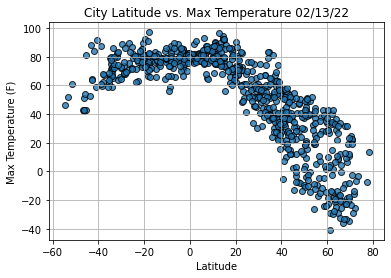

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig1.png")

# Show plot.
plt.show()

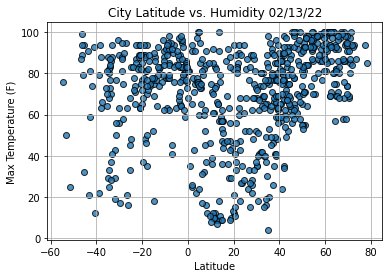

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig2.png")

# Show plot.
plt.show()

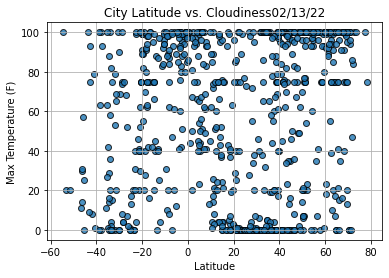

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig3.png")

# Show plot.
plt.show()

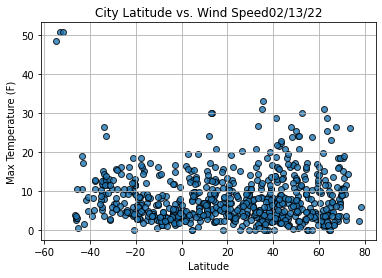

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed"+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_database/Fig4.png")

# Show plot.
plt.show()

In [16]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
index13 = city_data_df.loc[13]
index13

City                    Mogadishu
Country                        SO
Date          2022-02-13 17:36:09
Lat                        2.0371
Lng                       45.3438
Max Temp                    77.74
Humidity                       78
Cloudiness                    100
Wind Speed                  16.28
Name: 13, dtype: object

In [18]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3      False
4       True
       ...  
711     True
712    False
713    False
714    False
715     True
Name: Lat, Length: 716, dtype: bool

In [19]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Ligayan,PH,2022-02-13 17:36:03,4.6533,119.4706,81.28,76,100,9.55
4,Nikel,RU,2022-02-13 17:36:04,69.4128,30.2220,10.58,91,100,7.16
7,Kapaa,US,2022-02-13 17:36:05,22.0752,-159.3190,70.12,85,100,12.66
8,Dhangadhi,NP,2022-02-13 17:36:05,28.7079,80.5961,56.17,75,0,4.16
9,Talaya,RU,2022-02-13 17:36:06,61.3833,152.7500,-40.81,100,89,1.61


In [20]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

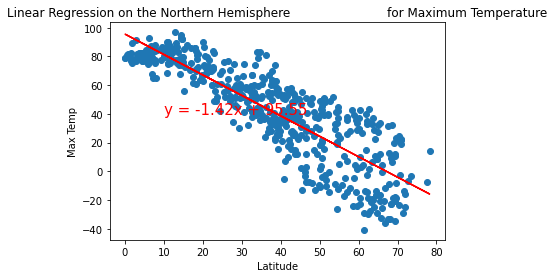

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

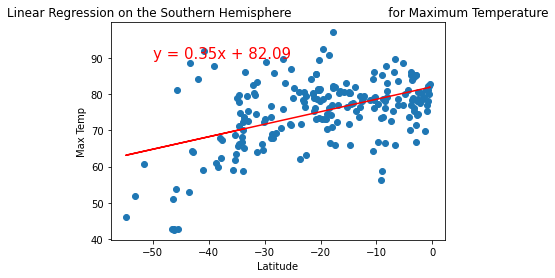

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

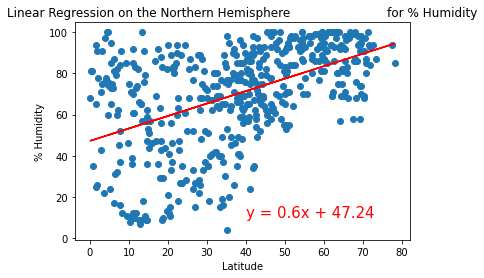

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

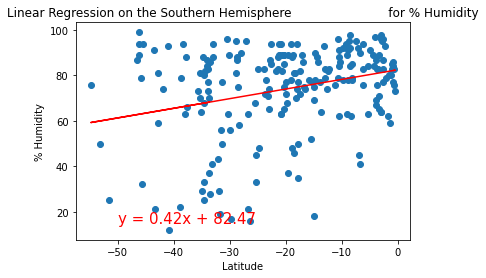

In [24]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

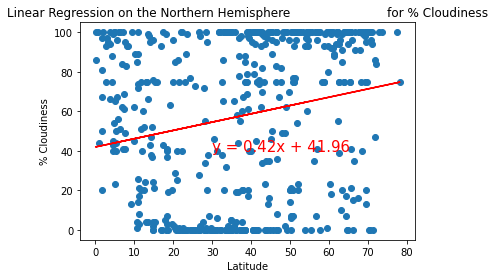

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(30,40))

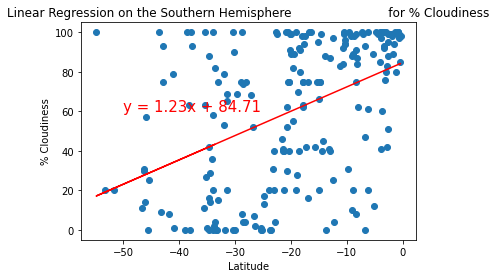

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


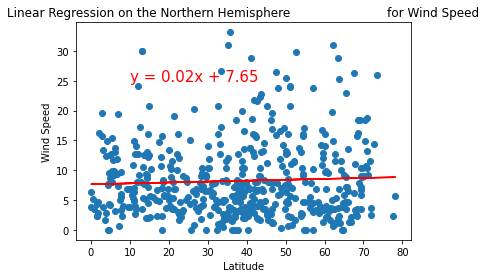

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

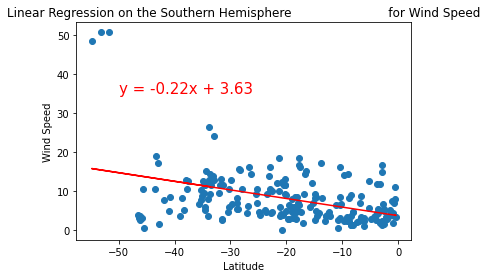

In [48]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [49]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [50]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_database/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Busselton,AU,2022-02-13 17:36:02,-33.6500,115.3333,65.05,70,4,12.48
1,1,Ligayan,PH,2022-02-13 17:36:03,4.6533,119.4706,81.28,76,100,9.55
2,2,Ushuaia,AR,2022-02-13 17:36:03,-54.8000,-68.3000,46.06,76,100,48.34
3,3,Avarua,CK,2022-02-13 17:36:04,-21.2078,-159.7750,75.25,94,40,3.44
4,4,Nikel,RU,2022-02-13 17:36:04,69.4128,30.2220,10.58,91,100,7.16


In [51]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)


In [52]:
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
temps = []
for temp in max_temp:
    temps.append(max(temp, 0))

In [56]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights = [max(temp, 0) for temp in max_temp])
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig = gmaps.figure(center = (30.0, 31.0), zoom_level=1.5)

In [54]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Humidity"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=humidity, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [57]:
# Heatmap of percent humidity
locations = city_data_df[["Lat", "Lng"]]
humidity = city_data_df["Wind Speed"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=wind_speed, dissipating=False, max_intensity=300, point_radius=4)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [58]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [60]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Ligayan,PH,2022-02-13 17:36:03,4.6533,119.4706,81.28,76,100,9.55
3,3,Avarua,CK,2022-02-13 17:36:04,-21.2078,-159.7750,75.25,94,40,3.44
12,12,Touros,BR,2022-02-13 17:36:07,-5.1989,-35.4608,88.70,63,12,12.55
13,13,Mogadishu,SO,2022-02-13 17:36:09,2.0371,45.3438,77.74,78,100,16.28
15,15,Edd,ER,2022-02-13 17:36:12,13.9297,41.6925,78.01,76,95,5.12
17,17,Rikitea,PF,2022-02-13 17:36:13,-23.1203,-134.9692,78.51,71,31,13.69
29,29,Atuona,PF,2022-02-13 17:36:17,-9.8000,-139.0333,77.40,78,31,14.14
31,31,Puerto Ayora,EC,2022-02-13 17:31:25,-0.7393,-90.3518,82.36,86,98,7.00
33,33,Faanui,PF,2022-02-13 17:36:18,-16.4833,-151.7500,81.01,74,100,14.99
34,34,Farafangana,MG,2022-02-13 17:36:19,-22.8167,47.8333,76.55,87,4,4.23


In [61]:
preferred_cities_df.count()

City_ID       222
City          222
Country       220
Date          222
Lat           222
Lng           222
Max Temp      222
Humidity      222
Cloudiness    222
Wind Speed    222
dtype: int64

In [62]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Ligayan,PH,81.28,4.6533,119.4706,
3,Avarua,CK,75.25,-21.2078,-159.7750,
12,Touros,BR,88.70,-5.1989,-35.4608,
13,Mogadishu,SO,77.74,2.0371,45.3438,
15,Edd,ER,78.01,13.9297,41.6925,
17,Rikitea,PF,78.51,-23.1203,-134.9692,
29,Atuona,PF,77.40,-9.8000,-139.0333,
31,Puerto Ayora,EC,82.36,-0.7393,-90.3518,
33,Faanui,PF,81.01,-16.4833,-151.7500,
34,Farafangana,MG,76.55,-22.8167,47.8333,


In [63]:
# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [64]:
# Dependencies and Setup
import requests
import gmaps

# Import API key
from config import g_key

In [65]:
# Set the parameters to search for a hotel in Paris.
params = {
    "radius": 5000,
    "types": "lodging",
    "key": g_key,
    "location": "48.8566, 2.3522"}
# Use base URL to search for hotels in Paris.
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
# Make request and get the JSON data from the search.
hotels = requests.get(base_url, params=params).json()

hotels

{'html_attributions': [],
 'next_page_token': 'Aap_uEBQRqhBwo_fnQh2bAUXYYk7Rxh30V6-YHNgaL6KGuuKbY7IRhKjmFFmffhZ7tqBoKbyZ2VSNG4RaV-1NaqdqIJsiG4-V8-KvsEAyNIzc39ffUVGGfveOi8yQUaaz2v47LOgkzyvlCENJ5NpqPXRYSkcsDgM63MvsxLURORy2zTgnlCc1WpzFAbOt1A2bcADQuLXua-SbwyxzHuWWA9UpTjc5LbDshU_g7zUtjXdII3JChM7ozpyxcNRxJaNG_Dhs_15OF85f3Y6tc9NIadSRwpo0UZjaNQ08VME1j8RSfgAPb5RjNDIH-zbb9bU-vzHui2q_HhiSRaiF8-Mb6rijfoLXtKKgSrB9fVQpMuKQGiAbH6Len_7G73eLUvAh-3EyOc2bqnWhzGmK7O7WPbB2oCHR9vJSYZhT1Xaprr6NJUW1oXFrEk6ep0G',
 'results': [{'business_status': 'OPERATIONAL',
   'geometry': {'location': {'lat': 48.8581126, 'lng': 2.3529277},
    'viewport': {'northeast': {'lat': 48.8594360302915,
      'lng': 2.354355480291502},
     'southwest': {'lat': 48.8567380697085, 'lng': 2.351657519708498}}},
   'icon': 'https://maps.gstatic.com/mapfiles/place_api/icons/v1/png_71/lodging-71.png',
   'icon_background_color': '#909CE1',
   'icon_mask_base_uri': 'https://maps.gstatic.com/mapfiles/place_api/icons/v2/hotel_pinlet',
   'nam

In [70]:
# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
            hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
            print("Hotel not found.... skipping.")
    

Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.
Hotel not found.... skipping.


In [74]:
# Add a heatmap of temperature for the vacation spots.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp, dissipating=False,
             max_intensity=400, point_radius=2)

fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [75]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [80]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]


In [81]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))